## Central Limit Theorem

From the [Wikipedia](https://en.wikipedia.org/wiki/Central_limit_theorem):
>In probability theory, the central limit theorem (CLT) establishes that, in some situations, when independent random variables are added, their properly normalized sum tends toward a normal distribution (informally a "bell curve") even if the original variables themselves are not normally distributed. The theorem is a key concept in probability theory because it implies that probabilistic and statistical methods that work for normal distributions can be applicable to many problems involving other types of distributions.

In [28]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

Let's create an exponential distributed data. Our population.

In [29]:
exp_data = np.random.exponential(size=100000)

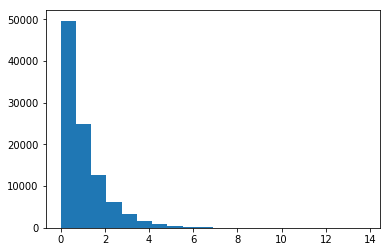

In [30]:
plt.hist(exp_data, bins=20)
plt.show()

In [31]:
print('True mean: {:.3f}'.format(exp_data.mean()))
print('True std: {:.3f}'.format(exp_data.std()))

True mean: 1.006
True std: 1.008


We extract some samples from the previous population:

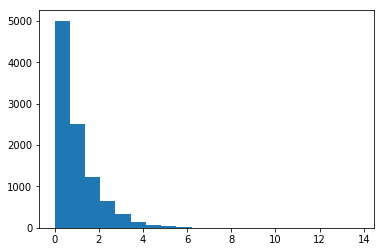

In [32]:
samples = [np.random.choice(exp_data) for _ in range(10000)]
plt.hist(samples,bins=20)
plt.show()

Note that these samples follow an exponential distribution.

This function returns the mean of an array elements grouped (in order) by `group_size`.

Eg.: mean_samples(\[2,4,8,2\], 2) ~> \[3, 5\].

In [33]:
def means_samples(samples, group_size):
    means = []
    for i in range(0,len(samples),group_size):
        mean = 0
        for j in range(group_size):
            mean += samples[i+j] * 1/group_size
        means.append(mean)
    return means

On the next section, we can see how increasing the sample size with wich we will perform the mean (specially if your original distribution is not symmetrical) it's very important in order to get the *bell shape* of a normal distribution.

We can also see how it's important that **the samples must be shuffled**. So if you want to be sure that the data that you are collecting is random, you can apply the `CTL` theorem.

Please, note that, obviously, the peak is always around the mean.

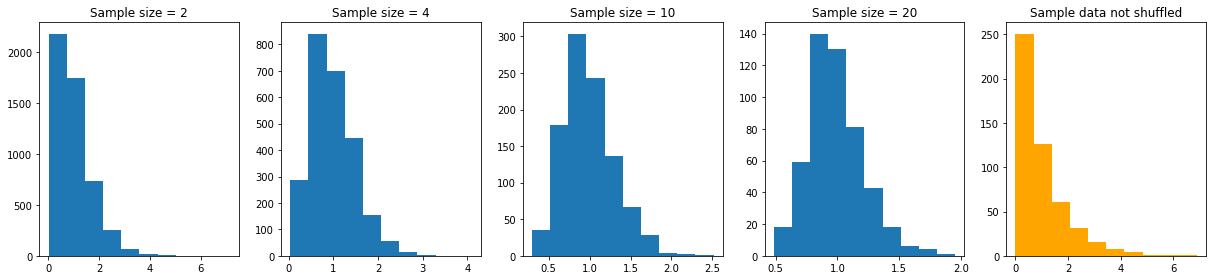

In [34]:
fig, ax = plt.subplots(1, 5, figsize=(17,4))
ax[0].hist(means_samples(samples,2))
ax[0].set_title('Sample size = 2')
ax[1].hist(means_samples(samples,4))
ax[1].set_title('Sample size = 4')
ax[2].hist(means_samples(samples,10))
ax[2].set_title('Sample size = 10')
ax[3].hist(means_samples(samples,20))
ax[3].set_title('Sample size = 20')
ax[4].hist(means_samples(np.sort(samples),20), color='orange')
ax[4].set_title('Sample data not shuffled')
plt.tight_layout()

### Same with uniform distribution

In [35]:
uni_data = np.random.uniform(size=100000)

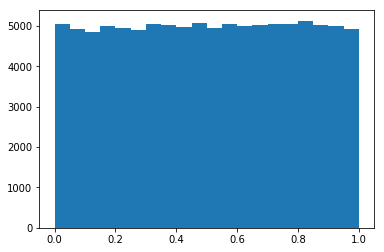

In [36]:
plt.hist(uni_data, bins=20)
plt.show()

In [37]:
print('True mean: {:.3f}'.format(uni_data.mean()))
print('True std: {:.3f}'.format(uni_data.std()))

True mean: 0.501
True std: 0.288


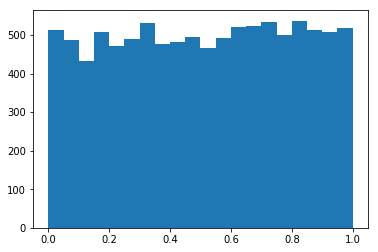

In [38]:
uni_samples = [np.random.choice(uni_data) for _ in range(10000)]
plt.hist(uni_samples,bins=20)
plt.show()

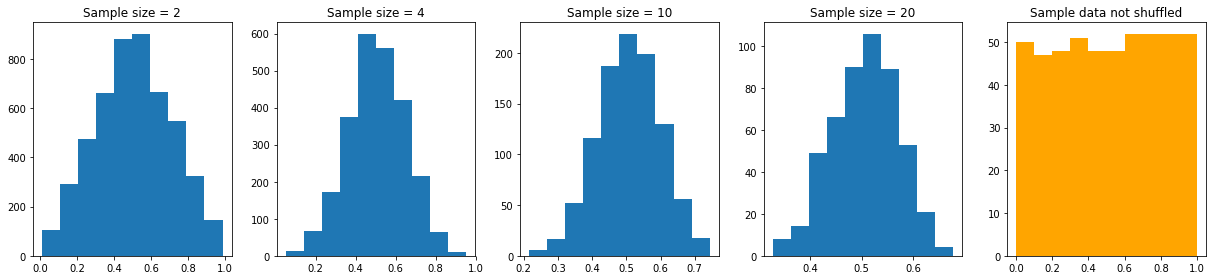

In [39]:
fig, ax = plt.subplots(1, 5, figsize=(17,4))
ax[0].hist(means_samples(uni_samples,2))
ax[0].set_title('Sample size = 2')
ax[1].hist(means_samples(uni_samples,4))
ax[1].set_title('Sample size = 4')
ax[2].hist(means_samples(uni_samples,10))
ax[2].set_title('Sample size = 10')
ax[3].hist(means_samples(uni_samples,20))
ax[3].set_title('Sample size = 20')
ax[4].hist(means_samples(np.sort(uni_samples),20), color='orange')
ax[4].set_title('Sample data not shuffled')
plt.tight_layout()

It's more easy to get the *bell shape* if the distribution is symmetrical.